# Polynomial Regression
In this notebook, linear regression using polynomial features is applied and visualized. The effect of adding a regularizer to the least squares function on over-fitting is visualized.

[Check my Github repository for similar introductory notebooks](https://github.com/YZouzou/ML-Topics-Intro)

In [197]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from ipywidgets import interact
import ipywidgets as widgets
plt.style.use('bmh')

### `linear_regr()`
This function calculates the linear regression coefficients and intercept using the least squares method. The coefficients are calculated from the centered data (mean subtracted) and then the intercept is calculated using the mean values of the original (uncentered) data.

In [54]:
def linear_regr(x, y):
    x_norm = x - x.mean(axis = 0)
    y_norm = y - y.mean(axis = 0)
    Theta = np.linalg.inv(x_norm.T @ x_norm) @ x_norm.T @ y_norm
    b = y.mean(axis = 0) - x.mean(axis = 0) @ Theta
    return np.append(b, Theta.flatten())

### `ridge_regr`
This function calculates the linear regression coefficients and intercept using the least squares method with a Ridge (L2) regularizer. Values are centered first and the intercept is calculated using the mean values of the original (uncentered) data.

In [53]:
def ridge_regr(x, y, delta):
    x_norm = x - x.mean(axis = 0)
    y_norm = y - y.mean(axis = 0)
    
    Theta = np.linalg.inv(x_norm.T @ x_norm + delta * np.eye(x.shape[1])) @ x_norm.T @ y_norm
    b = y.mean(axis = 0) - x.mean(axis = 0) @ Theta
    
    return np.append(b, Theta.flatten())

### `poly(x, degree)`
This function creates the polynomial features array from a univariate input feature vector.

In [27]:
def poly(x, degree):
    poly_x = np.zeros((x.shape[0], degree + 1))
    for n in range(degree + 1):
        poly_x[:, n] = x**n
    return poly_x

### Polynomial Regression
* Using polynomial transform, every X data instance is transformed to a new instance with more features.
* These features include different exponentials and combinations to create a polynomial regression.
* Using the new features a normal linear or ridge regression can be applied on these features.

Think of it as moving to a higher dimensional space and applying a linear regression in that space on the transformed features, where the transformed features are polynomial combinations of the original features.

**Creating a noisy set of points**

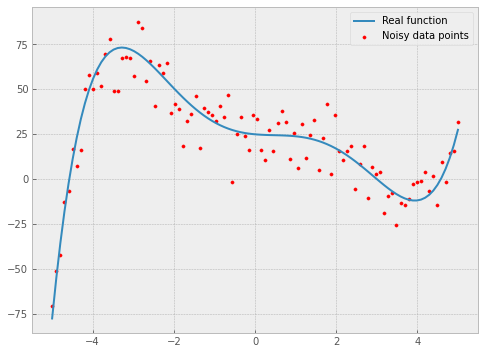

In [228]:
x = np.linspace(-5, 5, 100)
y_real = 25 - 2*x + 3*x**2 -2*x**3 - 0.2*x**4 + 0.1*x**5
y = y_real + np.random.randn(100) * 10

plt.figure(figsize = (8, 6))
plt.scatter(x, y, color = 'red', s = 10, label = 'Noisy data points')
plt.plot(x, y_real, label = 'Real function')
plt.legend()
plt.show()

**Set degree of regression curve:**

In [236]:
degree = 14
poly_x = poly(x, degree)

### Visualizing regularizer effect on polynomial fitting
Notice that increasing $\delta^{2}$ increases the smoothness of the regression curve and therefore avoids overfitting. However, for larger $\delta^{2}$ values, results become far from realistic (under-fit).

In [237]:
@interact(delta = widgets.FloatSlider(min = -6, max = 10, step = 3.0, value = -6))
def plot_poly_regr(delta):
    delta = 2**delta
    theta = ridge_regr(poly_x[:, 1:], y, delta)

    y_hat = poly_x @ theta

    plt.figure(figsize = (8, 6))
    plt.scatter(x, y, color = 'red', s = 10, label = 'Data points')
    plt.plot(x, y_hat, label = 'Regression line')
    
    plt.xlim(min(x)-1, max(x) + 1)
    plt.ylim(min(y)-1, max(y) + 1)
    plt.title('\u03B4\u00B2 = {:.2f}'.format(delta))
    plt.xlabel('x')
    plt.ylabel('y_hat')
    plt.plot(x, y_real, color = 'black', alpha = 0.5, label = 'Real function')
    plt.legend()


plt.show()

interactive(children=(FloatSlider(value=-6.0, description='delta', max=10.0, min=-6.0, step=3.0), Output()), _…